# figure 2

Computation of eigenvalues of covariance matrices of recordings at 22Hz (calcium imaging) or binned at 22Hz (ephys)

In [1]:
import numpy as np 
import torch
import sys, os
sys.path.insert(0, "../")
import analysis
from pathlib import Path

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# datasets will be shared upon publication
# available to reviewers at private figshare link
# will take < 10 min to run on GPU
dbs_2P = [{"mouse_name": "FX14", "area": "V1"},
            {"mouse_name": "FX17", "area": "V1"},
            {"mouse_name": "FX26", "area": "V1"},
            {"mouse_name": "FX42", "area": "V1"},
            {"mouse_name": "FX43", "area": "V1"},
            {"mouse_name": "QZ2", "area": "V1"},
            {"mouse_name": "GP7", "area": "CA1"},
            {"mouse_name": "GP8", "area": "CA1"},
            {"mouse_name": "GP9", "area": "CA1"},
            {"mouse_name": "GP10", "area": "CA1"}]
dbs_ephys = [{"mouse_name": "Krebs"},
             {"mouse_name": "Waksman"},
             {"mouse_name": "Robbins"}]

root = Path("/media/carsen/ssd3/random_matrix") # folder with shared datasets
out = analysis.neural_powerlaws(root, dbs_2P, dbs_ephys, device=device)
evals_all, evals_svca2_all, evals_svca_all, evals_shuff_all, areas_all, Xexs, isorts, snr_rat = out

os.makedirs("../results", exist_ok=True)
np.save("../results/evals_neural_all.npy", {"evals_all": evals_all, 
                                 "evals_svca2_all": evals_svca2_all,
                                 "evals_svca_all": evals_svca_all,
                                 "evals_shuff_all": evals_shuff_all, 
                                 "areas_all": areas_all, "Xexs": Xexs, "isorts": isorts, 
                                 "snr_rat": snr_rat})


>>> FX14, n_neurons(SNR>0.3) = 6433, nt = 198623 (150.5 minutes)
	alpha: direct=0.68, SVCA2=0.84, SVCA=0.97, SVCA2_shuff=0.50
>>> FX17, n_neurons(SNR>0.3) = 10595, nt = 196938 (149.2 minutes)
	alpha: direct=0.68, SVCA2=0.79, SVCA=0.94, SVCA2_shuff=0.49
running rastermap
2025-02-27 06:28:11,594 [INFO] projecting out mean along axis=0
2025-02-27 06:28:23,336 [INFO] data normalized, 11.75sec
2025-02-27 06:28:27,621 [INFO] sorting activity: 10595 valid samples by 196938 timepoints
2025-02-27 06:28:44,828 [INFO] n_PCs = 128 computed, 33.24sec
2025-02-27 06:28:48,196 [INFO] 67 clusters computed, time 36.60sec
2025-02-27 06:28:50,948 [INFO] clusters sorted, time 39.36sec
2025-02-27 06:28:51,063 [INFO] clusters upsampled, time 39.47sec
2025-02-27 06:28:55,603 [INFO] rastermap complete, time 44.01sec
>>> FX26, n_neurons(SNR>0.3) = 9053, nt = 173540 (131.5 minutes)
	alpha: direct=0.72, SVCA2=0.84, SVCA=0.97, SVCA2_shuff=0.55
>>> FX42, n_neurons(SNR>0.3) = 10205, nt = 158930 (120.4 minutes)
	alph

### make figure

4.340148881406582e-06
0.5293270141498515
0.003579065932020731


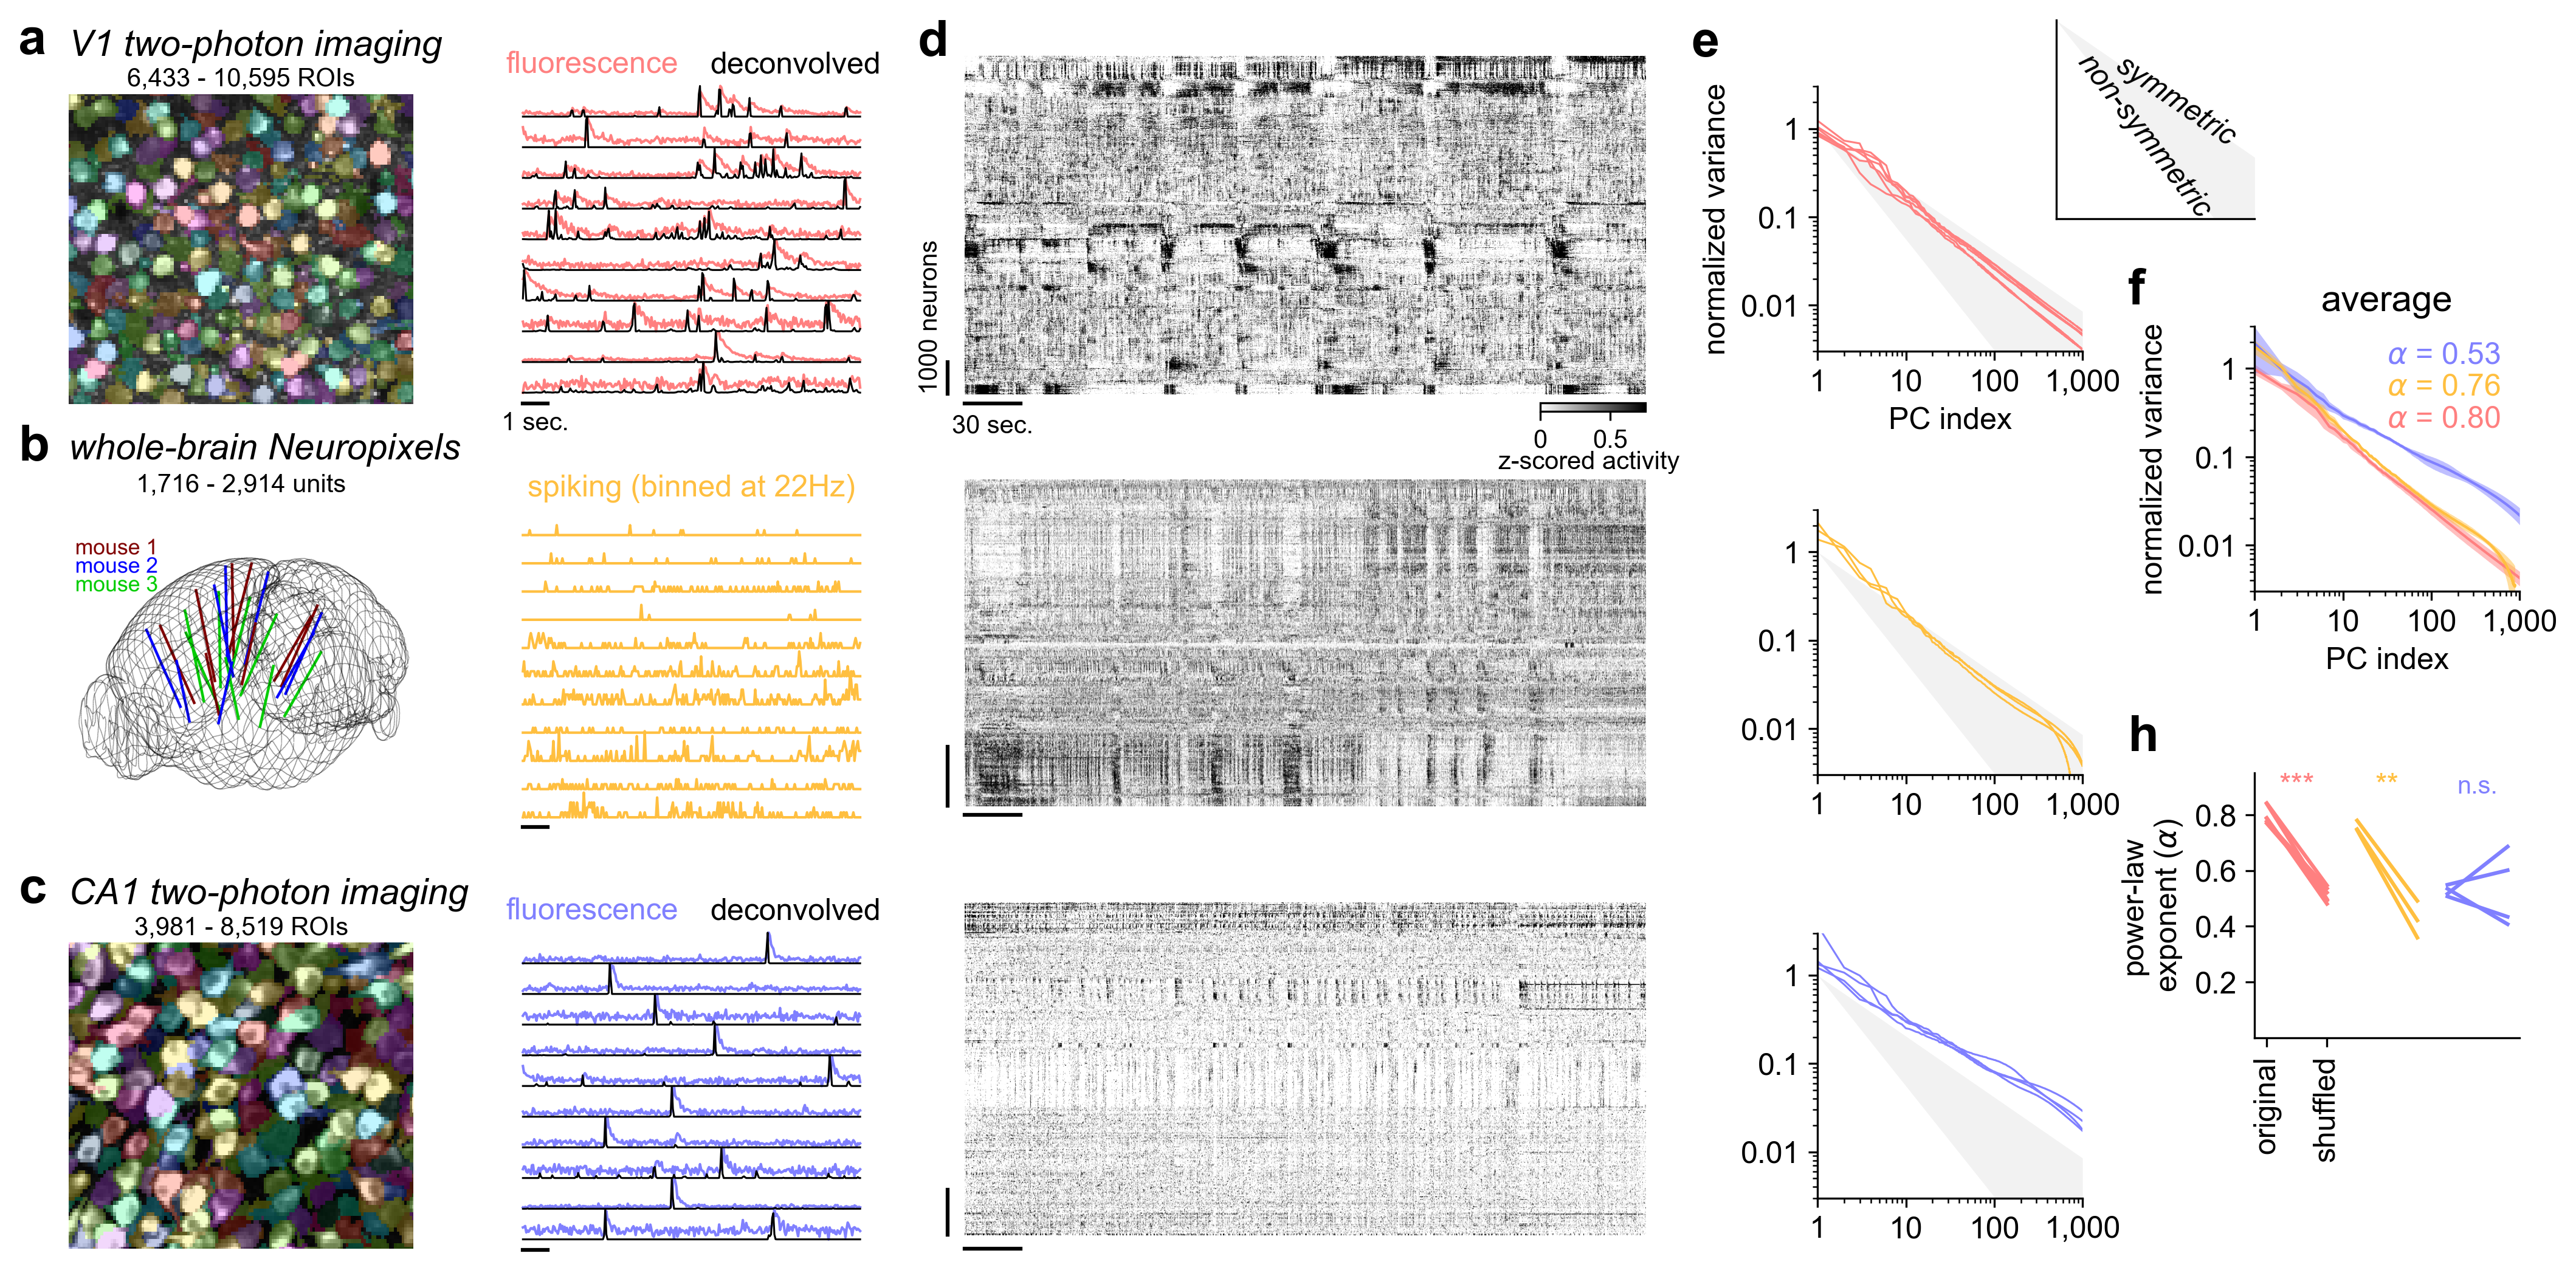

In [ ]:
import fig2

dat = np.load("../results/evals_neural_all.npy", allow_pickle=True).item()
dat_traces = np.load("traces.npy", allow_pickle=True).item()
dat = {**dat, **dat_traces}
fig = fig2.fig2(dat)
os.makedirs("../figures", exist_ok=True)
fig.savefig("../figures/fig2.pdf")

### Figure S4

Eigenvalue estimation on simulations with added noise and smoothing, and on recordings

In [16]:
import simulations

# adding noise and smoothing to simulations to test estimation of eigenvalues (~1.2 hours)
# 10 simulations with different random initial conditions, 60000 timepoints long
out = simulations.random_uniform_sim_noisy(n_sim=10, nn=10000)
evals_gt_all, evals_all, evals_svca_all, evals_svca2_all, nonsyms = out 

np.save("../results/evals_svca_all.npy", 
        {"evals_gt_all": evals_gt_all, "evals_all": evals_all, 
         "evals_svca_all": evals_svca_all, 
         "evals_svca2_all": evals_svca2_all,
         "nonsyms": nonsyms})
    

100%|██████████| 60000/60000 [00:32<00:00, 1873.63it/s]


0 0; alpha_gt: 0.70, alpha: 0.67, alpha_svca: 0.87, alpha_svca2: 0.71


100%|██████████| 60000/60000 [00:32<00:00, 1874.96it/s]


0 0.3333333333333333; alpha_gt: 0.77, alpha: 0.73, alpha_svca: 0.97, alpha_svca2: 0.77


100%|██████████| 60000/60000 [00:31<00:00, 1876.00it/s]


0 0.6666666666666666; alpha_gt: 1.30, alpha: 1.18, alpha_svca: 1.61, alpha_svca2: 1.24


100%|██████████| 60000/60000 [00:31<00:00, 1875.55it/s]


0 1; alpha_gt: 1.19, alpha: 1.09, alpha_svca: 1.42, alpha_svca2: 1.15


100%|██████████| 60000/60000 [00:32<00:00, 1870.45it/s]


1 0; alpha_gt: 0.67, alpha: 0.65, alpha_svca: 0.86, alpha_svca2: 0.69


100%|██████████| 60000/60000 [00:31<00:00, 1875.50it/s]


1 0.3333333333333333; alpha_gt: 0.80, alpha: 0.76, alpha_svca: 1.03, alpha_svca2: 0.81


100%|██████████| 60000/60000 [00:31<00:00, 1875.33it/s]


1 0.6666666666666666; alpha_gt: 1.17, alpha: 1.05, alpha_svca: 1.46, alpha_svca2: 1.11


100%|██████████| 60000/60000 [00:31<00:00, 1875.29it/s]


1 1; alpha_gt: 1.23, alpha: 1.16, alpha_svca: 1.43, alpha_svca2: 1.21


100%|██████████| 60000/60000 [00:32<00:00, 1870.75it/s]


2 0; alpha_gt: 0.68, alpha: 0.65, alpha_svca: 0.87, alpha_svca2: 0.69


100%|██████████| 60000/60000 [00:31<00:00, 1875.78it/s]


2 0.3333333333333333; alpha_gt: 0.84, alpha: 0.79, alpha_svca: 1.09, alpha_svca2: 0.84


100%|██████████| 60000/60000 [00:32<00:00, 1874.13it/s]


2 0.6666666666666666; alpha_gt: 1.23, alpha: 1.06, alpha_svca: 1.58, alpha_svca2: 1.13


100%|██████████| 60000/60000 [00:32<00:00, 1874.03it/s]


2 1; alpha_gt: 1.21, alpha: 1.13, alpha_svca: 1.43, alpha_svca2: 1.18


100%|██████████| 60000/60000 [00:32<00:00, 1868.36it/s]


3 0; alpha_gt: 0.66, alpha: 0.64, alpha_svca: 0.84, alpha_svca2: 0.68


100%|██████████| 60000/60000 [00:32<00:00, 1874.67it/s]


3 0.3333333333333333; alpha_gt: 0.88, alpha: 0.82, alpha_svca: 1.18, alpha_svca2: 0.88


100%|██████████| 60000/60000 [00:32<00:00, 1873.95it/s]


3 0.6666666666666666; alpha_gt: 1.20, alpha: 1.10, alpha_svca: 1.44, alpha_svca2: 1.15


100%|██████████| 60000/60000 [00:32<00:00, 1873.86it/s]


3 1; alpha_gt: 1.18, alpha: 1.11, alpha_svca: 1.39, alpha_svca2: 1.16


100%|██████████| 60000/60000 [00:32<00:00, 1867.88it/s]


4 0; alpha_gt: 0.67, alpha: 0.65, alpha_svca: 0.85, alpha_svca2: 0.69


100%|██████████| 60000/60000 [00:32<00:00, 1874.85it/s]


4 0.3333333333333333; alpha_gt: 0.76, alpha: 0.73, alpha_svca: 0.96, alpha_svca2: 0.76


100%|██████████| 60000/60000 [00:32<00:00, 1873.62it/s]


4 0.6666666666666666; alpha_gt: 1.14, alpha: 1.06, alpha_svca: 1.38, alpha_svca2: 1.11


100%|██████████| 60000/60000 [00:32<00:00, 1873.71it/s]


4 1; alpha_gt: 1.28, alpha: 1.19, alpha_svca: 1.50, alpha_svca2: 1.25


100%|██████████| 60000/60000 [00:32<00:00, 1867.37it/s]


5 0; alpha_gt: 0.68, alpha: 0.65, alpha_svca: 0.86, alpha_svca2: 0.69


100%|██████████| 60000/60000 [00:32<00:00, 1873.91it/s]


5 0.3333333333333333; alpha_gt: 0.80, alpha: 0.77, alpha_svca: 1.02, alpha_svca2: 0.81


100%|██████████| 60000/60000 [00:32<00:00, 1874.25it/s]


5 0.6666666666666666; alpha_gt: 1.31, alpha: 1.15, alpha_svca: 1.64, alpha_svca2: 1.22


100%|██████████| 60000/60000 [00:32<00:00, 1873.76it/s]


5 1; alpha_gt: 1.27, alpha: 1.14, alpha_svca: 1.56, alpha_svca2: 1.21


100%|██████████| 60000/60000 [00:32<00:00, 1867.31it/s]


6 0; alpha_gt: 0.68, alpha: 0.65, alpha_svca: 0.86, alpha_svca2: 0.69


100%|██████████| 60000/60000 [00:32<00:00, 1874.12it/s]


6 0.3333333333333333; alpha_gt: 0.78, alpha: 0.75, alpha_svca: 1.00, alpha_svca2: 0.79


100%|██████████| 60000/60000 [00:32<00:00, 1873.67it/s]


6 0.6666666666666666; alpha_gt: 0.98, alpha: 0.89, alpha_svca: 1.21, alpha_svca2: 0.95


100%|██████████| 60000/60000 [00:32<00:00, 1872.79it/s]


6 1; alpha_gt: 1.32, alpha: 1.14, alpha_svca: 1.68, alpha_svca2: 1.23


100%|██████████| 60000/60000 [00:32<00:00, 1866.89it/s]


7 0; alpha_gt: 0.66, alpha: 0.64, alpha_svca: 0.86, alpha_svca2: 0.68


100%|██████████| 60000/60000 [00:32<00:00, 1874.11it/s]


7 0.3333333333333333; alpha_gt: 0.74, alpha: 0.71, alpha_svca: 0.92, alpha_svca2: 0.75


100%|██████████| 60000/60000 [00:32<00:00, 1873.16it/s]


7 0.6666666666666666; alpha_gt: 1.02, alpha: 0.90, alpha_svca: 1.32, alpha_svca2: 0.98


100%|██████████| 60000/60000 [00:32<00:00, 1874.27it/s]


7 1; alpha_gt: 1.13, alpha: 1.08, alpha_svca: 1.31, alpha_svca2: 1.13


100%|██████████| 60000/60000 [00:32<00:00, 1867.78it/s]


8 0; alpha_gt: 0.68, alpha: 0.66, alpha_svca: 0.89, alpha_svca2: 0.69


100%|██████████| 60000/60000 [00:32<00:00, 1874.48it/s]


8 0.3333333333333333; alpha_gt: 0.81, alpha: 0.77, alpha_svca: 1.03, alpha_svca2: 0.82


100%|██████████| 60000/60000 [00:32<00:00, 1873.37it/s]


8 0.6666666666666666; alpha_gt: 0.91, alpha: 0.88, alpha_svca: 1.08, alpha_svca2: 0.92


100%|██████████| 60000/60000 [00:32<00:00, 1874.03it/s]


8 1; alpha_gt: 1.13, alpha: 1.06, alpha_svca: 1.34, alpha_svca2: 1.12


100%|██████████| 60000/60000 [00:32<00:00, 1867.15it/s]


9 0; alpha_gt: 0.68, alpha: 0.66, alpha_svca: 0.85, alpha_svca2: 0.69


100%|██████████| 60000/60000 [00:32<00:00, 1874.11it/s]


9 0.3333333333333333; alpha_gt: 0.82, alpha: 0.78, alpha_svca: 1.04, alpha_svca2: 0.82


100%|██████████| 60000/60000 [00:32<00:00, 1874.49it/s]


9 0.6666666666666666; alpha_gt: 1.07, alpha: 1.01, alpha_svca: 1.29, alpha_svca2: 1.05


100%|██████████| 60000/60000 [00:31<00:00, 1875.32it/s]


9 1; alpha_gt: 1.37, alpha: 1.14, alpha_svca: 1.78, alpha_svca2: 1.21


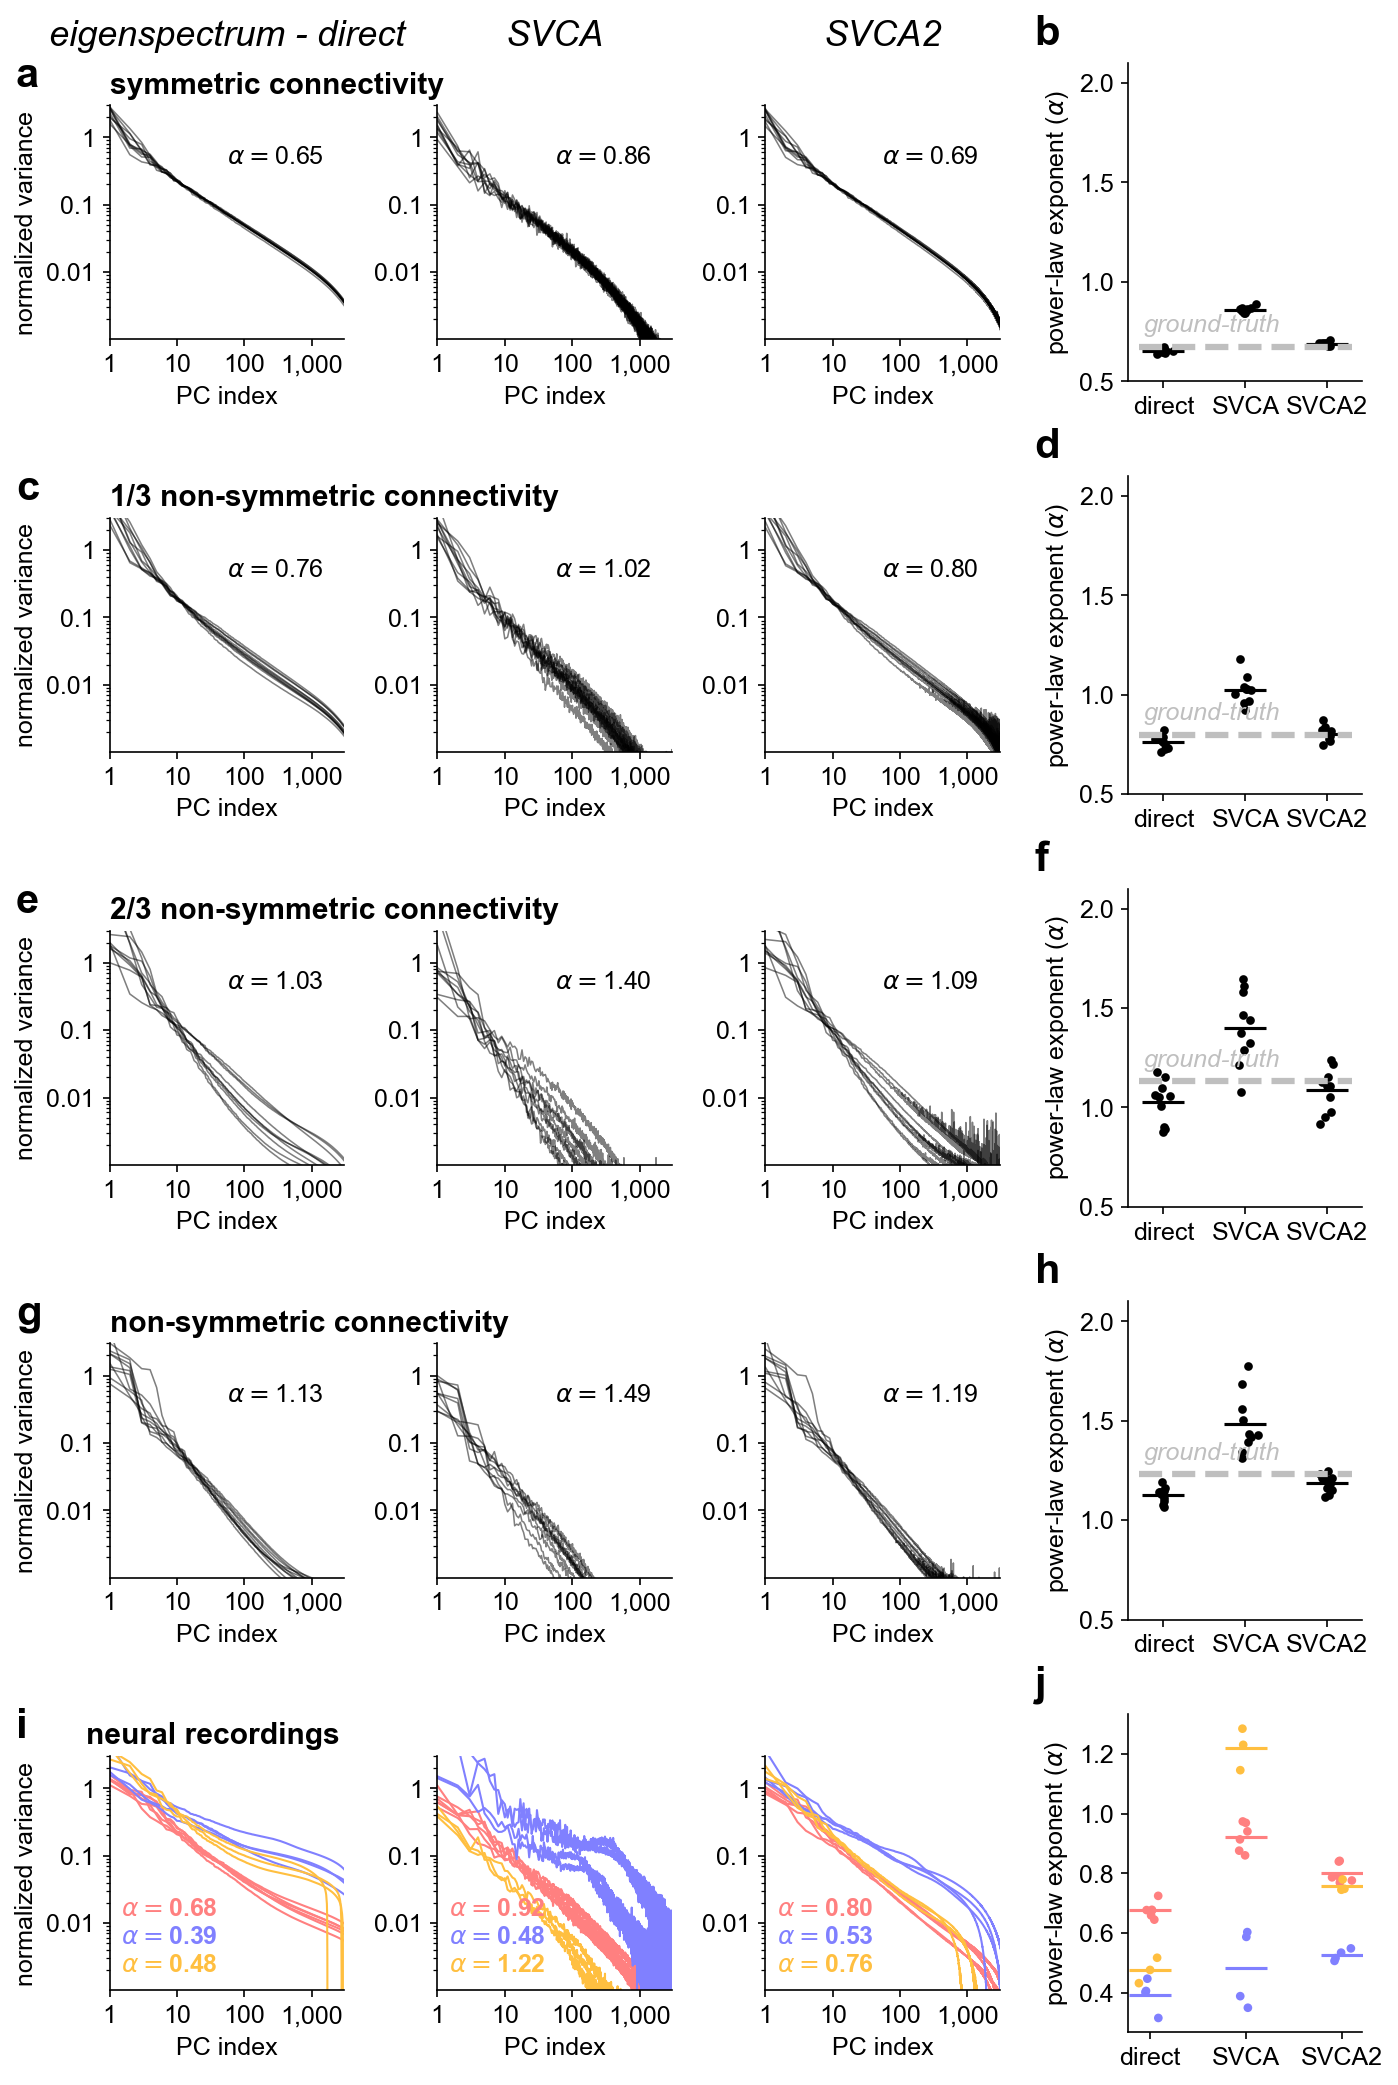

In [ ]:
dat_sim = np.load("../results/evals_svca_all.npy", allow_pickle=True).item()
fig = fig2.suppfig_svca(dat_sim, dat)
fig.savefig("../figures/suppfig_svca.pdf", dpi=150)